In [126]:
#pacages used in this notebook
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression

#pacages from previous notebooks
# from matplotlib import ticker, axis
# from matplotlib.ticker import AutoMinorLocator
# from matplotlib.backends.backend_pdf import PdfPages
# from scipy import optimize
# from scipy import misc
# from scipy import stats

#plot style
plt.style.use("style.mplstyle")
#calculate chi-squared
def chi_squared_np(x, y, y_err, slope, intercept):
    chi2 = np.sum(np.square(y - slope*x-intercept) / np.square(y_err)) 
    return chi2

In [127]:
#read the data
file = pd.read_csv(r'CL_FH.csv')
data = np.genfromtxt('CL_FH.csv', delimiter=',')
crude_v = data[:,1]
crude_i = data[:,2]
precise_v = data[:23,3]
precise_i = data[:23,4]
crude_i_err = np.zeros(len(crude_i))+0.01/np.sqrt(12)
precise_i_err = np.zeros(len(precise_i))+0.01/np.sqrt(12)
diff = np.zeros(10)
volt = np.zeros(10)
diff_max = np.zeros(5)
diff_min = np.zeros(5)
for i in range(len(diff)):
    diff[i] = precise_v[2*i+4]-precise_v[2*i]
    volt[i] = (precise_v[2*i+4]+precise_v[2*i])/2
    if i%2 == 0:
        diff_max[int(i/2)] = diff[i]
    if i%2 == 1:
        diff_min[int((i-1)/2)] = diff[i]
avg_diff = np.mean(diff)
avg_diff_max = np.mean(diff_max)
avg_diff_min = np.mean(diff_min)
diff_err = 0.1/np.sqrt(6)
#num = np.arange(1,11)

In [128]:
print(avg_diff, avg_diff_max, avg_diff_min, diff_err)

5.08 4.999999999999999 5.16 0.040824829046386304


In [134]:
volt_s = sm.add_constant(volt)
ols = sm.OLS(diff, volt_s)
res = ols.fit()
res.summary()

/Users/yizhi_jiao/Documents/GitHub/github/lib/python3.11/site-packages/scipy/stats/_stats_py.py:1736: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.563
Model:                            OLS   Adj. R-squared:                  0.509
Method:                 Least Squares   F-statistic:                     10.32
Date:                Fri, 21 Apr 2023   Prob (F-statistic):             0.0124
Time:                        02:09:58   Log-Likelihood:                 6.3565
No. Observations:                  10   AIC:                            -8.713
Df Residuals:                       8   BIC:                            -8.108
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.5940      0.158     29.087      0.000       4.230       4.958
x1             0.0200      0.006      3.212      0.012       0.006       0.034
==============================================================================
Omnibus:                        0.367   Durbin-Watson:                   1.770
Prob(Omnibus):                  0.832   Jarque-Bera (JB):                0.455
Skew:                           0.128   Prob(JB):                        0.796
Kurtosis:                       1.986   Cond. No.                         88.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

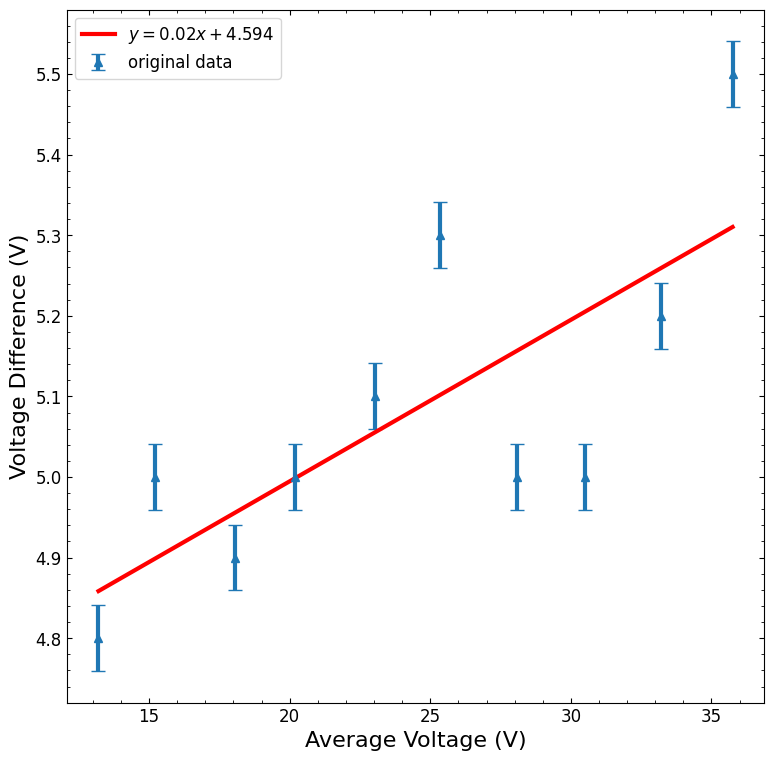

In [129]:
#plot the data
fig, ax=plt.subplots()
slr_1 = LinearRegression().fit(volt.transpose().reshape(-1,1), diff)
plt.errorbar(volt, diff, yerr= diff_err, label="original data", linestyle='None', marker='^', capsize=5)
plt.plot(volt, slr_1.predict(volt.transpose().reshape(-1,1)),label="$y=0.02x+4.594$", color='red')
plt.legend()
plt.ylabel("Voltage Difference (V)")
plt.xlabel("Average Voltage (V)")
plt.savefig('CL_FH_1.jpg')

In [130]:
print(slr_1.coef_, slr_1.intercept_)

[0.02003282] 4.594003797367614


In [131]:
chi_squared_np(volt, diff, diff_err, slr_1.coef_, slr_1.intercept_)/(len(diff)-2)

12.31597736738592

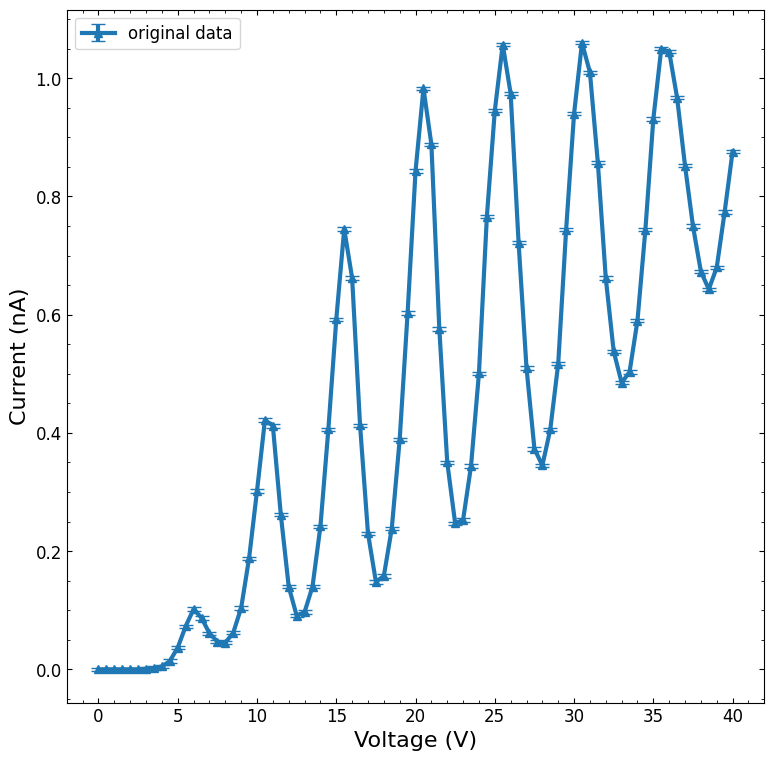

In [132]:
#plot the data
fig, ax=plt.subplots()
#slr_1 = LinearRegression().fit(num.transpose().reshape(-1,1), diff)
plt.errorbar(crude_v, crude_i, yerr= crude_i_err, label="original data", linestyle='-', marker='^', capsize=5)
#plt.plot(num, slr_1.predict(num.transpose().reshape(-1,1)),label="$y=0.0007x+0.1807$", color='red')
plt.legend()
plt.ylabel("Current (nA)")
plt.xlabel("Voltage (V)")
plt.savefig('CL_FH_2.jpg')

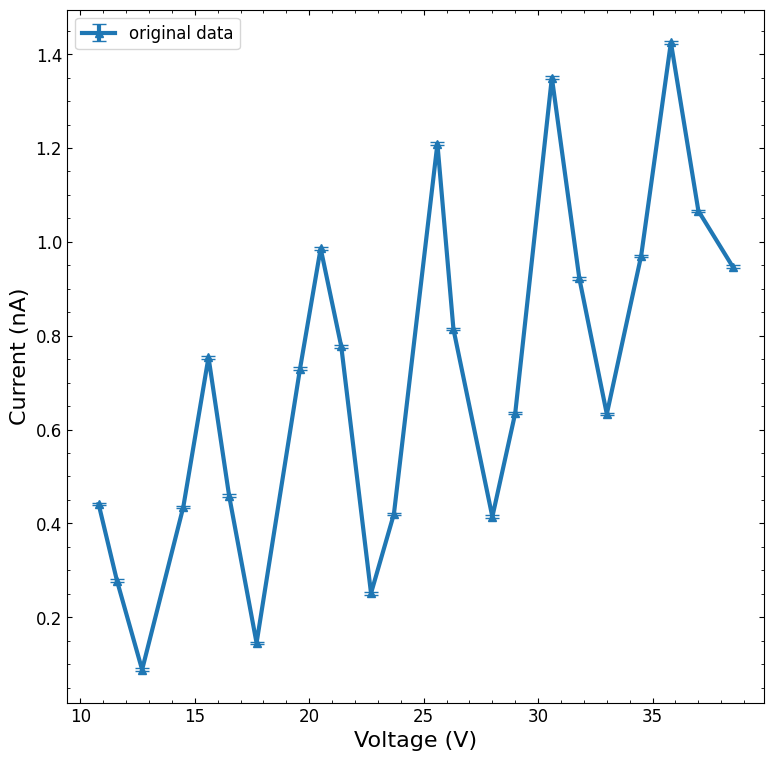

In [133]:
#plot the data
fig, ax=plt.subplots()
#slr_1 = LinearRegression().fit(num.transpose().reshape(-1,1), diff)
plt.errorbar(precise_v, precise_i, yerr= precise_i_err, label="original data", linestyle='-', marker='^', capsize=5)
#plt.plot(num, slr_1.predict(num.transpose().reshape(-1,1)),label="$y=0.0007x+0.1807$", color='red')
plt.legend()
plt.ylabel("Current (nA)")
plt.xlabel("Voltage (V)")
plt.savefig('CL_FH_3.jpg')